# GOAL OF THE PROJECT

**`Predict target feature first and foremost by geometrical parameters!`**

# IMPORTING LIBRARIES

In [20]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm as cmaps
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import re
import seaborn as sns
from scipy import stats
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox, pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from IPython.display import Image

print("Packages loaded!")

Packages loaded!


# READ DATA INTO DATAFRAME FROM EXISTING .CSV

In [21]:
def load_preprocesses_anonymized_data_without_ids():
    """
    Read production data and parse into pandas dataframe.
    """
    latest_file = r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\DA_Midterm_Project\_Data\Anonymized_Production_Data.csv"
    df_prod_whole = pd.read_csv(latest_file, sep=";", encoding = "ISO-8859-1")
    
    return df_prod_whole

df_prod_whole = load_preprocesses_anonymized_data_without_ids()

In [22]:
def load_preprocesses_anonymized_data_with_ids():
    """
    Read production data and parse into pandas dataframe.
    """
    latest_file = r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\DA_Midterm_Project\_Data\Anonymized_Production_Data_with_ID.csv"
    df_prod_whole = pd.read_csv(latest_file, sep=";", encoding = "ISO-8859-1")
    
    return df_prod_whole

df_cleaned = load_preprocesses_anonymized_data_without_ids()

# INITIAL EDA

## Check NaN distribution in features before processing

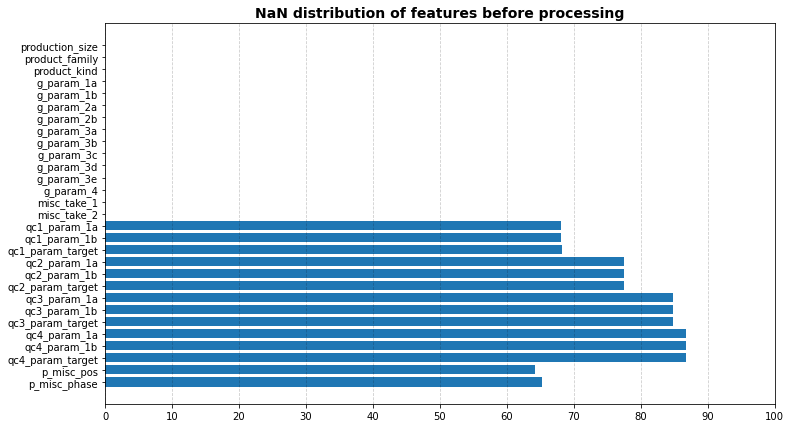

In [23]:
column_names = list(df_cleaned.isna().sum().index)
column_nan_count = list(df_cleaned.isna().sum())
column_lens = [len(df_cleaned)] * len(df_cleaned.columns)
column_nan_perc = [round((column_nan_count[idx]/column_lens[idx])*100,2)
                   for idx, col in enumerate(column_nan_count)]

df_nan_distribution = pd.DataFrame()
df_nan_distribution["Feature"] = column_names
df_nan_distribution["NaN %"] = column_nan_perc

y = column_names[::-1]
height = column_nan_perc[::-1]
plt.figure(figsize=(12,7))
plt.title("NaN distribution of features before processing", size=14, weight="bold")
plt.grid(ls="--", color="k", alpha=0.2, axis="x")
plt.barh(y, height)
plt.xticks(range(0,105,10))
plt.show()

## Initial EDA pairplot

sns.pairplot(df_cleaned)

# PROCESSING DATA

## Show relationship between target, qc_param_1a, qc_param_1b in different QCs

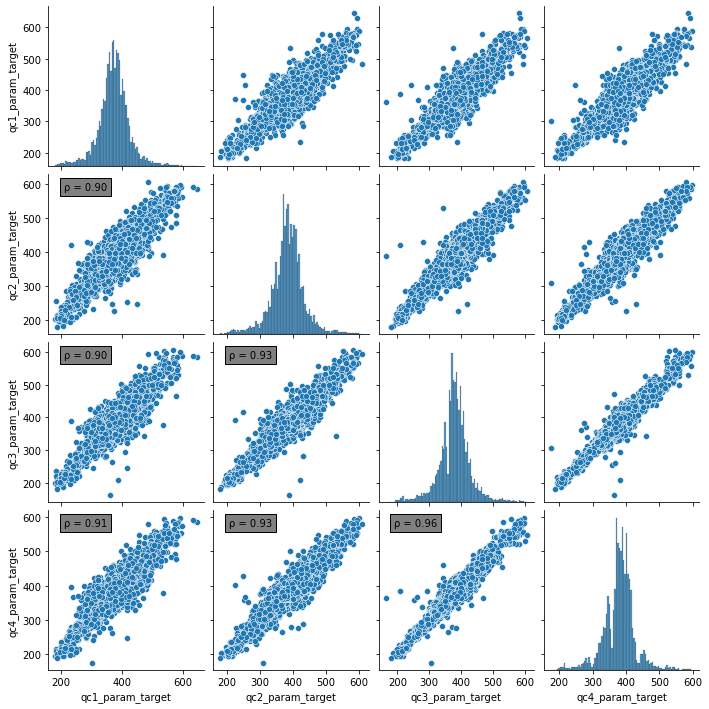

In [24]:
df_qc_target_check = df_cleaned[["qc1_param_target", "qc2_param_target", "qc3_param_target", "qc4_param_target"]]
df_qc_target_check = df_qc_target_check[(df_qc_target_check>150) & (df_qc_target_check<700)]
df_qc_target_check.dropna(axis=0, inplace=True)
df_qc_target_check.reset_index(drop=True, inplace=True)

# CREATE PAIRPLOT TO SHOW CORRELATIONS OF DIFFERENT QC TARGET STEPS
# DISPLAY CORRELATION (Pearson) IN RESPECTIVE PLOTS

def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    text = ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    text.set_bbox(dict(facecolor='grey', edgecolor='k'))

p = sns.pairplot(df_qc_target_check)
p.map_lower(corrfunc)
plt.show()

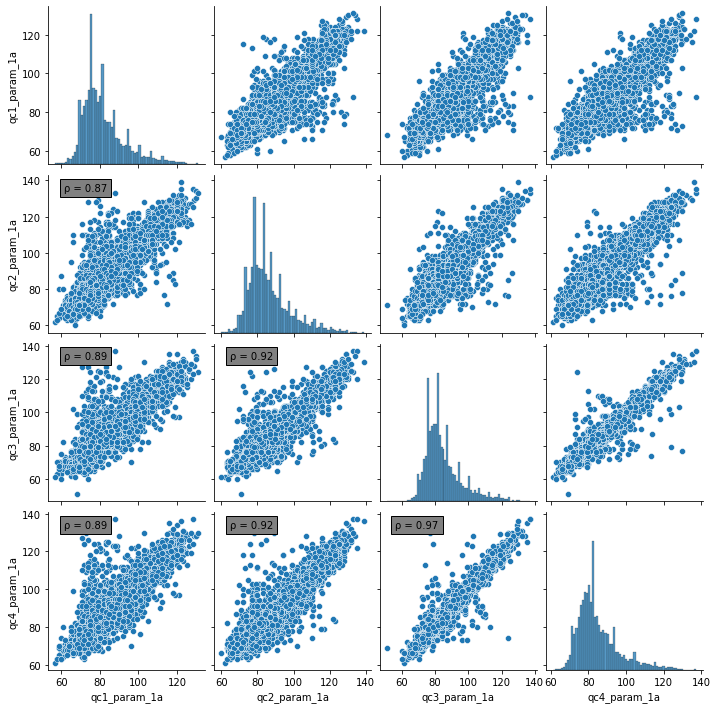

In [25]:
df_qc_target_check = df_cleaned[["qc1_param_1a", "qc2_param_1a", "qc3_param_1a", "qc4_param_1a"]]
df_qc_target_check = df_qc_target_check[(df_qc_target_check>50) & (df_qc_target_check<170)]
df_qc_target_check.dropna(axis=0, inplace=True)
df_qc_target_check.reset_index(drop=True, inplace=True)

# CREATE PAIRPLOT TO SHOW CORRELATIONS OF DIFFERENT QC TARGET STEPS
# DISPLAY CORRELATION (Pearson) IN RESPECTIVE PLOTS

def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    text = ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    text.set_bbox(dict(facecolor='grey', edgecolor='k'))

p = sns.pairplot(df_qc_target_check)
p.map_lower(corrfunc)
plt.show()

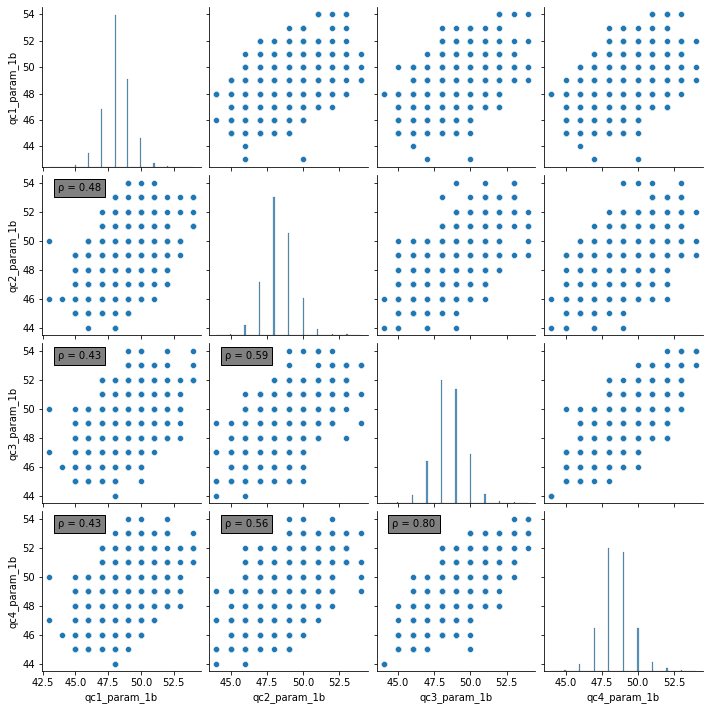

In [26]:
df_qc_target_check = df_cleaned[["qc1_param_1b", "qc2_param_1b", "qc3_param_1b", "qc4_param_1b"]]
df_qc_target_check = df_qc_target_check[(df_qc_target_check>40) & (df_qc_target_check<55)]
df_qc_target_check.dropna(axis=0, inplace=True)
df_qc_target_check.reset_index(drop=True, inplace=True)

# CREATE PAIRPLOT TO SHOW CORRELATIONS OF DIFFERENT QC TARGET STEPS
# DISPLAY CORRELATION (Pearson) IN RESPECTIVE PLOTS

def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    text = ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    text.set_bbox(dict(facecolor='grey', edgecolor='k'))

p = sns.pairplot(df_qc_target_check)
p.map_lower(corrfunc)
plt.show()

**`OBSERVATION / DESCRIPTION`**

- qc target parameters are strongly correlated (>= 0.9)
- qc param 1a are strongly correlated (>= 0.87)
- qc param 1b are less strongly correlated (>= 0.45)
    - nature of param 1b values (whole numbers betwen ~ 40-55) makes them appear discrete
    - they will be used as numerical feature though

*Different qc parameters will be aggregated to condense features into single (target) feature!* <br>

Initial round of model creation aims at predicting qc target. <br>
It is also planned to use geometric parameter + qc target to predict param 1a and param 1b.

## Aggregating qc_target, qc_param_1a, qc_param_1b in different QCs

In [27]:
# AVG ALL QC_TARGETs TO YIELD SINGLE TARGET FEATURE
qc1_target = df_cleaned["qc1_param_target"]
qc2_target = df_cleaned["qc2_param_target"]
qc3_target = df_cleaned["qc3_param_target"]
qc4_target = df_cleaned["qc4_param_target"]

# AVG ALL QC_PARAM_1a
qc1_param_1a = df_cleaned["qc1_param_1a"]
qc2_param_1a = df_cleaned["qc2_param_1a"]
qc3_param_1a = df_cleaned["qc3_param_1a"]
qc4_param_1a = df_cleaned["qc4_param_1a"]

# AVG ALL QC_PARAM_1b
qc1_param_1b = df_cleaned["qc1_param_1b"]
qc2_param_1b = df_cleaned["qc2_param_1b"]
qc3_param_1b = df_cleaned["qc3_param_1b"]
qc4_param_1b = df_cleaned["qc4_param_1b"]

qc_targets = list(zip(qc1_target, qc2_target, qc3_target, qc4_target))
qc_param_1a = list(zip(qc1_param_1a, qc2_param_1a, qc3_param_1a, qc4_param_1a))
qc_param_1b = list(zip(qc1_param_1b, qc2_param_1b, qc3_param_1b, qc4_param_1b))

qc_target_means = [np.nanmean(target) for target in qc_targets]
qc_param_1a_means = [np.nanmean(a) for a in qc_param_1a]
qc_param_1b_means = [np.nanmean(b) for b in qc_param_1b]

# ADD NEW QC_MEAN COLUMNS TO DF
df_cleaned["qc_target_mean"] = qc_target_means
df_cleaned["qc_param_1a_mean"] = qc_param_1a_means
df_cleaned["qc_param_1b_mean"] = qc_param_1b_means

# DROP SPECIFIC QC VOLUME, VOLTAGE, PULS COLUMNS & ONLY KEEP AVERAGED COLS
df_cleaned.drop(columns=["qc1_param_target", "qc2_param_target", "qc3_param_target","qc4_param_target",
                        "qc1_param_1a","qc2_param_1a","qc3_param_1a","qc4_param_1a",
                        "qc1_param_1b","qc2_param_1b","qc3_param_1b","qc4_param_1b"], inplace=True)

## Delete entries without target feature value

In [28]:
df_cleaned = df_cleaned[df_cleaned["qc_target_mean"].notnull()].reset_index(drop=True)

## EDA / Pairplot after initial data processing

In [ ]:
# GET NUMERICAL FEATURES FROM DATAFRAME
df_numerical_temp = df_cleaned.select_dtypes(include=np.number)

sns.pairplot(df_numerical_temp)

## Check NaN distribution in features post processing, but pre outlier / NaN trimming

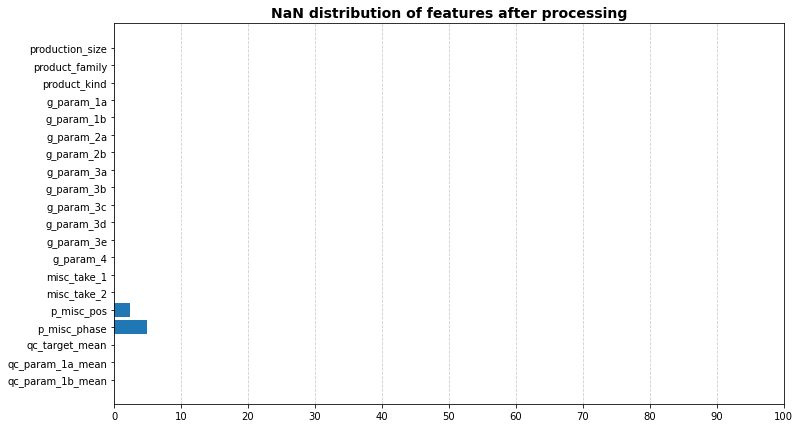

In [30]:
column_names = list(df_cleaned.isna().sum().index)
column_nan_count = list(df_cleaned.isna().sum())
column_lens = [len(df_cleaned)] * len(df_cleaned.columns)
column_nan_perc = [round((column_nan_count[idx]/column_lens[idx])*100,2)
                   for idx, col in enumerate(column_nan_count)]

df_nan_distribution = pd.DataFrame()
df_nan_distribution["Feature"] = column_names
df_nan_distribution["NaN %"] = column_nan_perc

y = column_names[::-1]
height = column_nan_perc[::-1]
plt.figure(figsize=(12,7))
plt.title("NaN distribution of features after processing", size=14, weight="bold")
plt.grid(ls="--", color="k", alpha=0.2, axis="x")
plt.barh(y, height)
plt.xticks(range(0,105,10))
plt.show()

## Dropping outliers / NaNs by trimming / pruning values to specific ranges
*Specific ranges are based on given production thresholds*

### Dropping outliers / NaNs by trimming - Geometric Parameters

In [31]:
# DROP ROWS WHERE VALUE IS BELOW/ABOVE CRITICAL, SENSIBLE THRESHOLD
print(len(df_cleaned))
df_cleaned = df_cleaned[(df_cleaned["g_param_2a"]>0) &
                       (df_cleaned["g_param_2a"]<=100)]
df_cleaned = df_cleaned[(df_cleaned["g_param_2b"]>0) &
                       (df_cleaned["g_param_2b"]<=90)]
df_cleaned = df_cleaned[(df_cleaned["g_param_3d"]>0) &
                       (df_cleaned["g_param_3d"]<=7)]
df_cleaned = df_cleaned[(df_cleaned["g_param_3e"]>=29) &
                       (df_cleaned["g_param_3e"]<=37)]
df_cleaned = df_cleaned[(df_cleaned["g_param_3a"]>=0) &
                       (df_cleaned["g_param_3a"]<=1.4)]
df_cleaned = df_cleaned[(df_cleaned["g_param_3b"]>0) &
                       (df_cleaned["g_param_3b"]<=1.2)]
df_cleaned = df_cleaned[(df_cleaned["g_param_3c"]>=0) &
                       (df_cleaned["g_param_3c"]<=4)]
df_cleaned = df_cleaned[(df_cleaned["g_param_4"]>=30) &
                       (df_cleaned["g_param_4"]<=70)]

26061


### Dropping outliers / NaNs by trimming - Functional Parameters

In [32]:
# DROP ROWS WHERE TARGET, PARAM_1a, PARAM_1b IS BELOW/ABOVE CRITICAL, SENSIBLE THRESHOLD
df_cleaned = df_cleaned[(df_cleaned["qc_target_mean"]>=150) &
                       (df_cleaned["qc_target_mean"]<=650)]
df_cleaned = df_cleaned[(df_cleaned["qc_param_1a_mean"]>=50) &
                       (df_cleaned["qc_param_1a_mean"]<=170)]
df_cleaned = df_cleaned[(df_cleaned["qc_param_1b_mean"]>=40) &
                       (df_cleaned["qc_param_1b_mean"]<=55)]

df_cleaned.reset_index(drop=True, inplace=True)
print(len(df_cleaned))

23330


## Check NaN distribution in all features after processing and outlier / NaN trimming

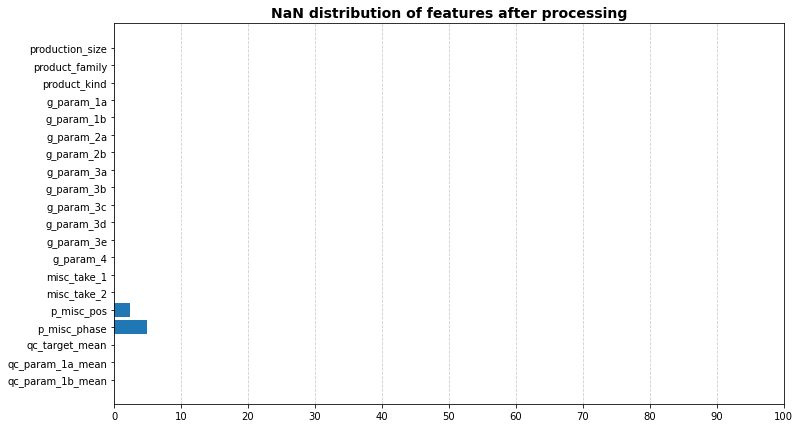

In [33]:
column_names = list(df_cleaned.isna().sum().index)
column_nan_count = list(df_cleaned.isna().sum())
column_lens = [len(df_cleaned)] * len(df_cleaned.columns)
column_nan_perc = [round((column_nan_count[idx]/column_lens[idx])*100,2)
                   for idx, col in enumerate(column_nan_count)]

df_nan_distribution = pd.DataFrame()
df_nan_distribution["Feature"] = column_names
df_nan_distribution["NaN %"] = column_nan_perc

y = column_names[::-1]
height = column_nan_perc[::-1]
plt.figure(figsize=(12,7))
plt.title("NaN distribution of features after processing", size=14, weight="bold")
plt.grid(ls="--", color="k", alpha=0.2, axis="x")
plt.barh(y, height)
plt.xticks(range(0,105,10))
plt.show()

## Splitting numerical and categorical data

In [34]:
# GET NUMERICAL FEATURES FROM DATAFRAME
df_numerical = df_cleaned.select_dtypes(include=np.number)

# DROP CATEGORICAL FEATURES FROM NUMERICAL DATAFRAME
df_numerical.drop(columns=["production_size", "product_kind", "product_family",
                          "misc_take_1","misc_take_2", "p_misc_pos"], inplace=True)

# TAKE CATEGORICAL FEATURES FROM DATAFRAME
df_categorical = df_cleaned[["product_kind", "production_size", 
                             "misc_take_1","misc_take_2", "p_misc_pos"]]

## Checking distribution patterns of  numericla data

array([[<AxesSubplot:title={'center':'g_param_1a'}>,
        <AxesSubplot:title={'center':'g_param_1b'}>,
        <AxesSubplot:title={'center':'g_param_2a'}>,
        <AxesSubplot:title={'center':'g_param_2b'}>],
       [<AxesSubplot:title={'center':'g_param_3a'}>,
        <AxesSubplot:title={'center':'g_param_3b'}>,
        <AxesSubplot:title={'center':'g_param_3c'}>,
        <AxesSubplot:title={'center':'g_param_3d'}>],
       [<AxesSubplot:title={'center':'g_param_3e'}>,
        <AxesSubplot:title={'center':'g_param_4'}>,
        <AxesSubplot:title={'center':'p_misc_phase'}>,
        <AxesSubplot:title={'center':'qc_target_mean'}>],
       [<AxesSubplot:title={'center':'qc_param_1a_mean'}>,
        <AxesSubplot:title={'center':'qc_param_1b_mean'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

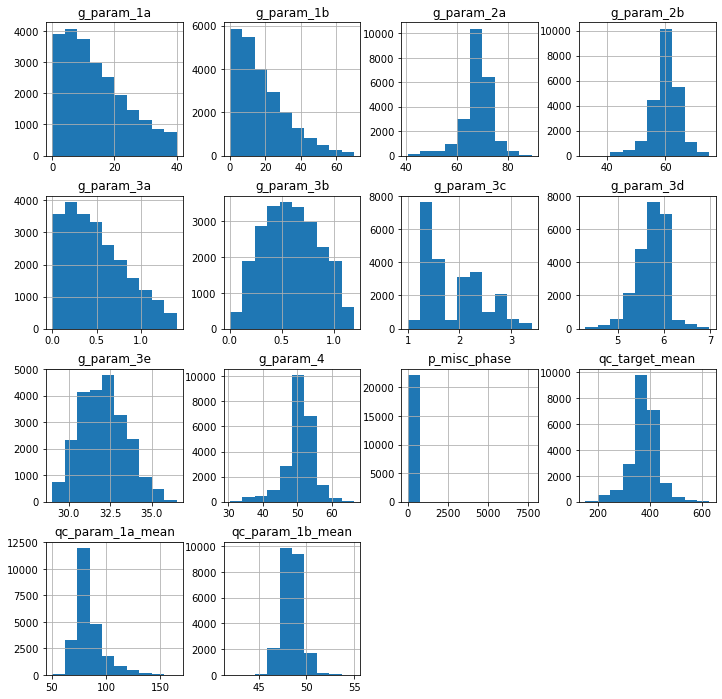

In [35]:
df_numerical.hist(figsize=(12,12))

## Processing NaN values - Numericals

### Fill NaN p_misc_phase with median of non-zero entries

df_numerical["p_misc_phase"].fillna(df_numerical["p_misc_phase"].median(), inplace=True)

## Processing NaN values - Categoricals

### Fill NaN misc_take_1 with average of non-zero entries
*min = 0; max = 5 --> based on procedural limits*

In [36]:
df_categorical["misc_take_1"].fillna(int(stats.mode(
    [int(k1e) for k1e in list(df_categorical["misc_take_1"].unique()) if 6 > k1e > 0])[0][0]), inplace=True)

### Fill NaN misc_take_2 with average of non-zero entries
*min = 0; max = 6 --> based on procedural limits*

In [37]:
df_categorical["misc_take_2"].fillna(
    int(stats.mode([int(k1e) for k1e in list(df_categorical["misc_take_2"].unique()) if 7 > k1e > 0])[0][0]), inplace=True)

### Fill NaN p_misc_pos with median

In [38]:
df_categorical["p_misc_pos"].fillna(df_categorical["p_misc_pos"].median(), inplace=True)

### Fill NaN production_size with median

In [39]:
df_categorical["production_size"].fillna(df_categorical["production_size"].median(), inplace=True)

### Check NaN distribution in categorical features after processing and outlier / NaN trimming

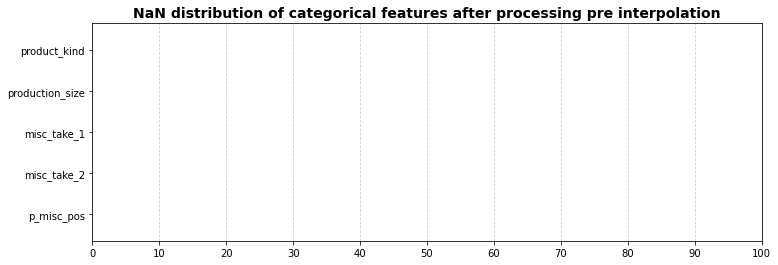

In [40]:
column_names = list(df_categorical.isna().sum().index)
column_nan_count = list(df_categorical.isna().sum())
column_lens = [len(df_categorical)] * len(df_categorical.columns)
column_nan_perc = [round((column_nan_count[idx]/column_lens[idx])*100,2)
                   for idx, col in enumerate(column_nan_count)]

df_nan_distribution = pd.DataFrame()
df_nan_distribution["Feature"] = column_names
df_nan_distribution["NaN %"] = column_nan_perc

y = column_names[::-1]
height = column_nan_perc[::-1]
plt.figure(figsize=(12,4))
plt.title("NaN distribution of categorical features after processing pre interpolation", size=14, weight="bold")
plt.grid(ls="--", color="k", alpha=0.2, axis="x")
plt.barh(y, height)
plt.xticks(range(0,105,10))
plt.show()

### Check NaN distribution in numerical features after processing and outlier / NaN trimming

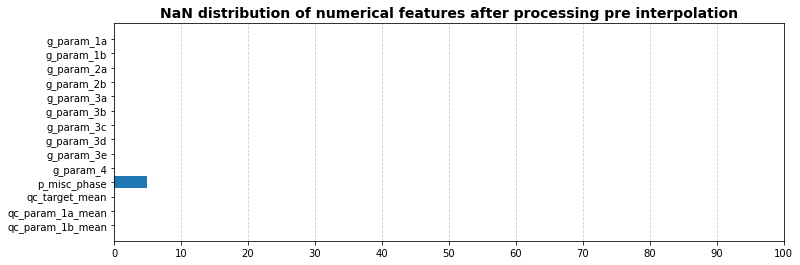

In [41]:
column_names = list(df_numerical.isna().sum().index)
column_nan_count = list(df_numerical.isna().sum())
column_lens = [len(df_numerical)] * len(df_numerical.columns)
column_nan_perc = [round((column_nan_count[idx]/column_lens[idx])*100,2)
                   for idx, col in enumerate(column_nan_count)]

df_nan_distribution = pd.DataFrame()
df_nan_distribution["Feature"] = column_names
df_nan_distribution["NaN %"] = column_nan_perc

y = column_names[::-1]
height = column_nan_perc[::-1]
plt.figure(figsize=(12,4))
plt.title("NaN distribution of numerical features after processing pre interpolation", size=14, weight="bold")
plt.grid(ls="--", color="k", alpha=0.2, axis="x")
plt.barh(y, height)
plt.xticks(range(0,105,10))
plt.show()

## Check multicollinearity for numerical features

<function matplotlib.pyplot.show(close=None, block=None)>

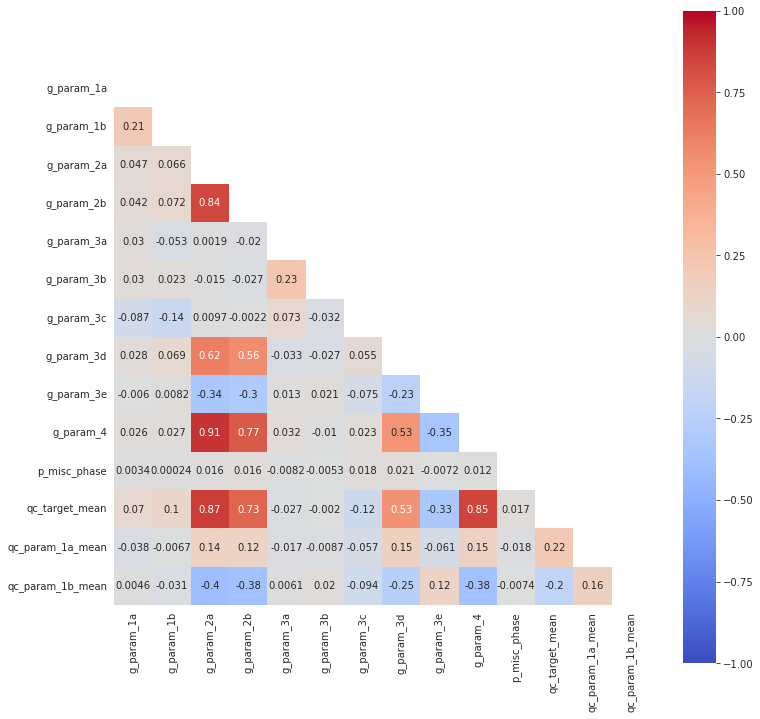

In [42]:
corr = df_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)
plt.show

In [43]:
def show_and_drop_high_correlation_features(df, threshold):
    """
    Show any features that have correlation higher than threshold with any other;
    """
    corr_matrix=df.corr().abs()
    upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    
    cols_above_threshold = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    cols_above_threshold = [col for col in cols_above_threshold if "target" not in col]
    df = df.drop(columns=cols_above_threshold)
    return df

df_numerical = show_and_drop_high_correlation_features(df_numerical, 0.8)

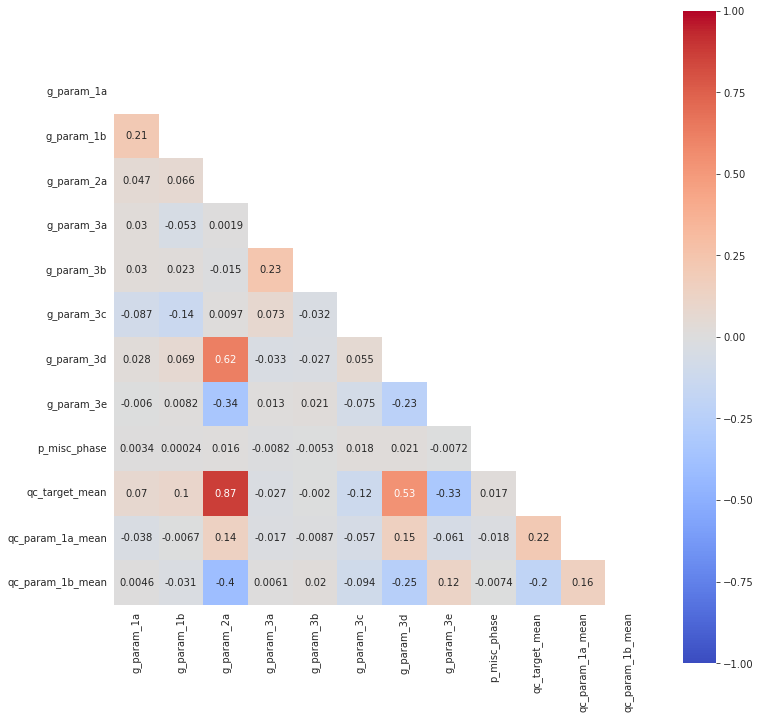

In [44]:
corr_matrix = df_numerical.corr()
corr = df_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)
    
plt.show()

## Hot-Encode categorical features

In [45]:
df_categorical_hotcoded = pd.get_dummies(df_categorical, drop_first=True)

# LINEAR REGRESSION

## Select data to be used

### Numerical only

df_to_use = df_numerical

### Numerical + Categorical

In [46]:
df_to_use = pd.concat([df_numerical, df_categorical], axis=1)

In [47]:
print("Rows before dropping NaN values: ", len(df_to_use))
df_to_use = df_to_use.dropna(axis=0)
print("Rows after dropping NaN values: ", len(df_to_use))

Rows before dropping NaN values:  23330
Rows after dropping NaN values:  22173


## X-y Split

In [48]:
X = df_to_use.drop(['qc_target_mean', 'qc_param_1a_mean', 'qc_param_1b_mean'], axis=1) 
y = df_to_use["qc_target_mean"]

## Train - Test - Split

In [49]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,random_state=42)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (15521, 14)
Shape X_test: (6652, 14)
Shape y_train: (15521,)
Shape y_test: (6652,)


## Standardize the data after data split

In [50]:
# Standardize training data
std_scaler = StandardScaler().fit(X_train) # get mean, variance from training set

# Scale training data
X_train_scaled = std_scaler.transform(X_train)

# Scale test data with mean, variance from training data
X_test_scaled = std_scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

model=LinearRegression()             # model
model.fit(X_train_scaled, y_train)   # model train

print("Coefficients (betas): ", np.around(model.coef_,2))
print("Coefficients (alpha): ", np.around(model.intercept_,2))

y_pred=model.predict(X_test_scaled)   # model prediction
y_pred_train=model.predict(X_train_scaled)

alpha = np.around(model.intercept_,2)
betas = [round(coef,2) for coef in model.coef_]

(15521, 14) (6652, 14)
Coefficients (betas):  [ 0.77  1.25 39.52 -1.64  0.65 -6.56 -1.04 -1.96  0.39  0.47  6.88  0.25
  0.25  1.58]
Coefficients (alpha):  377.64


In [51]:
eq = "qc_target_mean = "

for idx, coef in enumerate(betas):
    eq += str(coef) + " * " + list(X_train.columns)[idx] + " + " + "\n"
eq += str(alpha)

print(eq)

qc_target_mean = 0.77 * g_param_1a + 
1.25 * g_param_1b + 
39.52 * g_param_2a + 
-1.64 * g_param_3a + 
0.65 * g_param_3b + 
-6.56 * g_param_3c + 
-1.04 * g_param_3d + 
-1.96 * g_param_3e + 
0.39 * p_misc_phase + 
0.47 * product_kind + 
6.88 * production_size + 
0.25 * misc_take_1 + 
0.25 * misc_take_2 + 
1.58 * p_misc_pos + 
377.64


## Evaluating Model Performance

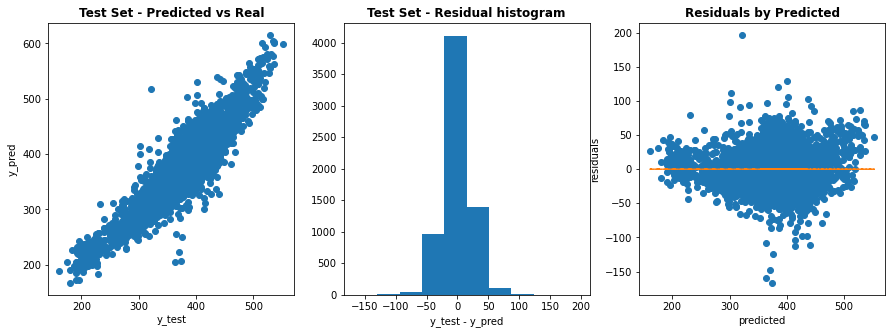

In [52]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

# Make an scatter plot y_pred vs y
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs Real", weight="bold")

# Get a histogram of the residuals ie: y - y_pred.  
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("y_test - y_pred")
ax[1].set_title("Test Set - Residual histogram", weight="bold")

# Homoscdasticity
# Check if residuals are somewhat uniformally distributed around null-line
ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted", weight="bold")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

plt.show()

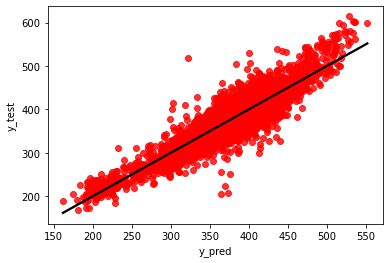

In [53]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.show()

## Error metrics

In [54]:
mse_1 = round(mse(y_test,y_pred),2)
rmse_1 = round(np.sqrt(mse(y_test,y_pred)),2)
mae_1 = round(mae(y_test,y_pred),2)

print("MSE:", mse_1)
print("RMSE:", rmse_1)
print("MAE:", mae_1)
print("-----")

# R^2
R2_1 = round(r2_score(y_test,y_pred),2)

# Adj. R^2
Adj_R2_1 = round(1 - (1-R2_1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),2) # X_test.shape[1] == len(X_test.columns)

print(f"R^2 for <numerical (with outliers) only> is {round(R2_1,2)}.")
print(f"Adjusted R^2 for <numerical (with outliers) only> is {round(Adj_R2_1,2)}.")

MSE: 532.06
RMSE: 23.07
MAE: 17.36
-----
R^2 for <numerical (with outliers) only> is 0.8.
Adjusted R^2 for <numerical (with outliers) only> is 0.8.


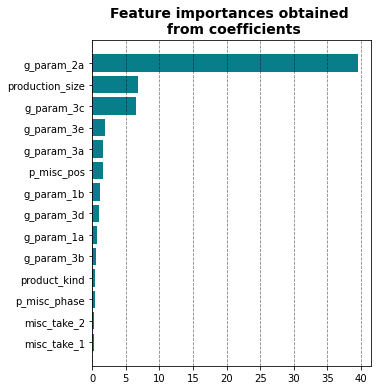

In [55]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)})

features_importances = features_importances.sort_values(by='Importance', ascending=False)
width = features_importances['Importance'][::-1]
y = features_importances['Attribute'][::-1]

fig = plt.figure(figsize=(5,6))
plt.grid(ls="--", alpha=0.5, color="k", axis="x")
plt.barh(y=y, width=width, color='#087E8B')
plt.title('Feature importances obtained \n from coefficients', size=14, weight="bold")
plt.xticks(list(range(0,int(max(width)+5),5)))
plt.show()

# MODEL EVALUATION

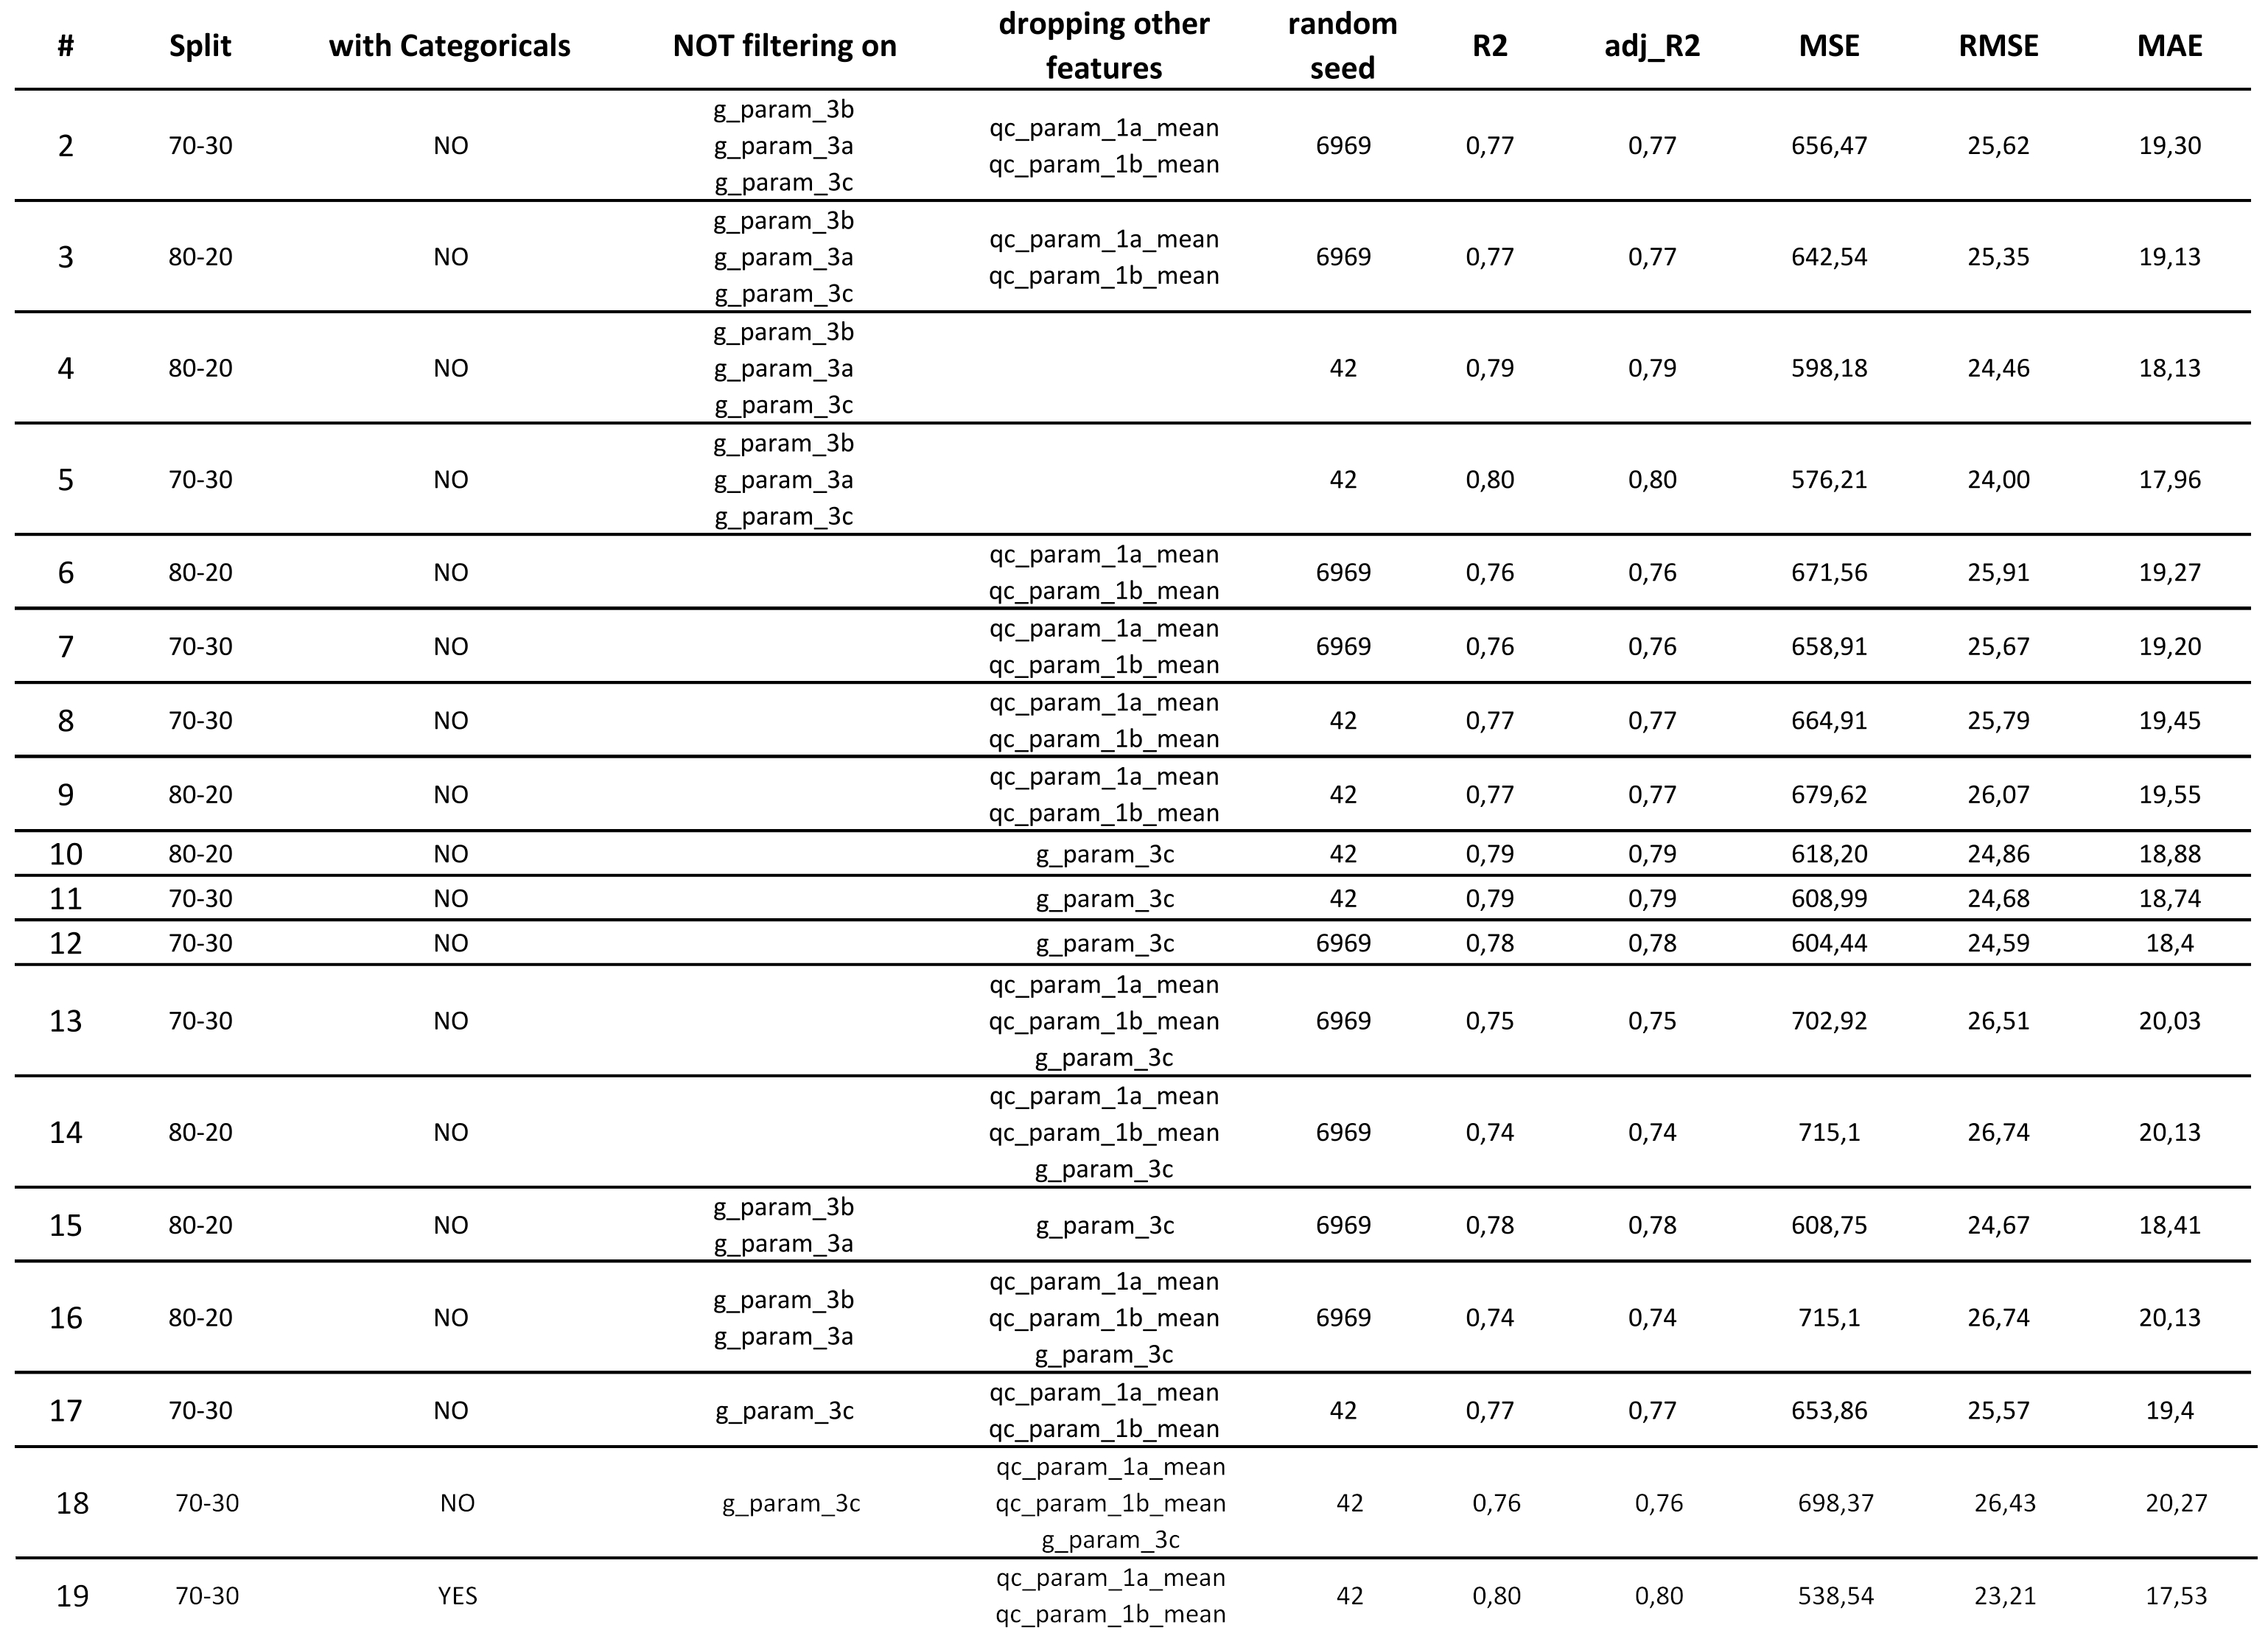

In [56]:
Image(r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\DA_Midterm_Project\Production_Notebook\Overview_Modeling_Results.jpg")

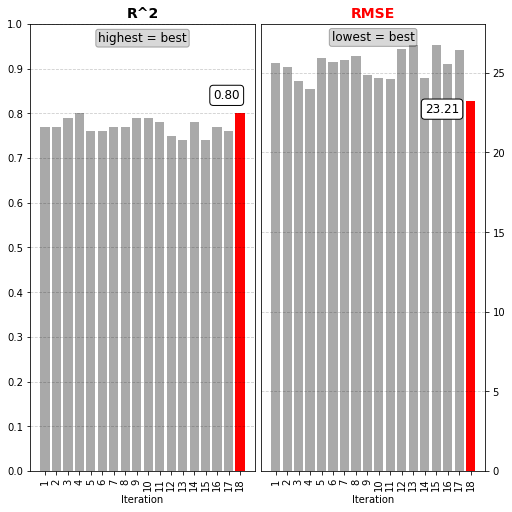

In [57]:
R2 = [0.77, 0.77, 0.79, 0.80, 0.76, 0.76, 0.77, 0.77, 0.79, 
0.79, 0.78, 0.75, 0.74, 0.78, 0.74, 0.77, 0.76, 0.80]

Iterations = list(range(1,len(R2)+1))

adj_R2 = [0.77, 0.77, 0.79, 0.80, 0.76, 0.76, 0.77, 0.77, 0.79, 
0.79, 0.78, 0.75, 0.74, 0.78, 0.74, 0.77, 0.76, 0.80]

MSE = [656.47, 642.54, 598.18, 576.21, 671.56, 658.91, 
       664.91, 679.62, 618.20, 608.99, 604.44, 702.92, 715.1, 
       608.75, 715.1, 653.86, 698.37, 538.54]

RMSE = [25.62, 25.35, 24.46, 24.00, 25.91, 25.67, 25.79, 
        26.07, 24.86, 24.68, 24.59, 26.51, 26.74, 24.67, 26.74, 
        25.57, 26.43, 23.21]

MAE = [19.30, 19.13, 18.13, 17.96, 19.27, 19.20, 19.45, 
       19.55, 18.88, 18.74, 18.4, 20.03, 20.13, 18.41, 20.13, 
       19.4, 20.27, 17.53]

fig, ax = plt.subplots(1, 2, figsize=(7,7), constrained_layout = True)

color = ["darkgrey"] * len(R2)
color[-1] = "red"

ax[0].bar(Iterations, R2, color=color)
ax[0].set_title('R^2', size=14, weight="bold")
ax[0].set_yticks(np.arange(0,1.01,0.1))
ax[0].grid(ls="--", color="k", alpha=0.2, axis="y")
ax[0].set_xticks(list(range(1,len(MSE)+1)))
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
ax[0].set_xlabel("Iteration")
ax[0].annotate("highest = best", ((len(MSE)+1)/2,0.96), 
               bbox=dict(boxstyle='round,pad=0.2', fc='grey', alpha=0.3),
              size=12, ha="center")
ax[0].annotate("0.80", (18,0.84), 
               bbox=dict(boxstyle='round', fc='white'),
              size=12, ha="right", va="center")

ax[1].bar(Iterations, RMSE, color=color)
ax[1].set_title('RMSE', size=14, weight="bold", color='red')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].grid(ls="--", color="k", alpha=0.2, axis="y")
ax[1].set_xticks(list(range(1,len(MSE)+1)))
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)

    
ax[1].set_xlabel("Iteration")
ax[1].annotate("lowest = best", ((len(MSE)+1)/2,27), 
               bbox=dict(boxstyle='round,pad=0.2', fc='grey', alpha=0.3),
              size=12, ha="center")
ax[1].annotate("23.21", (17,22.5), 
               bbox=dict(boxstyle='round', fc='white'),
              size=12, ha="right")

plt.show()